In [31]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import joblib

housing = fetch_california_housing()

In [10]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)

df["Price"] = housing.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [39]:
len(df.columns)

9

In [40]:
len(df)

20640

In [19]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [22]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

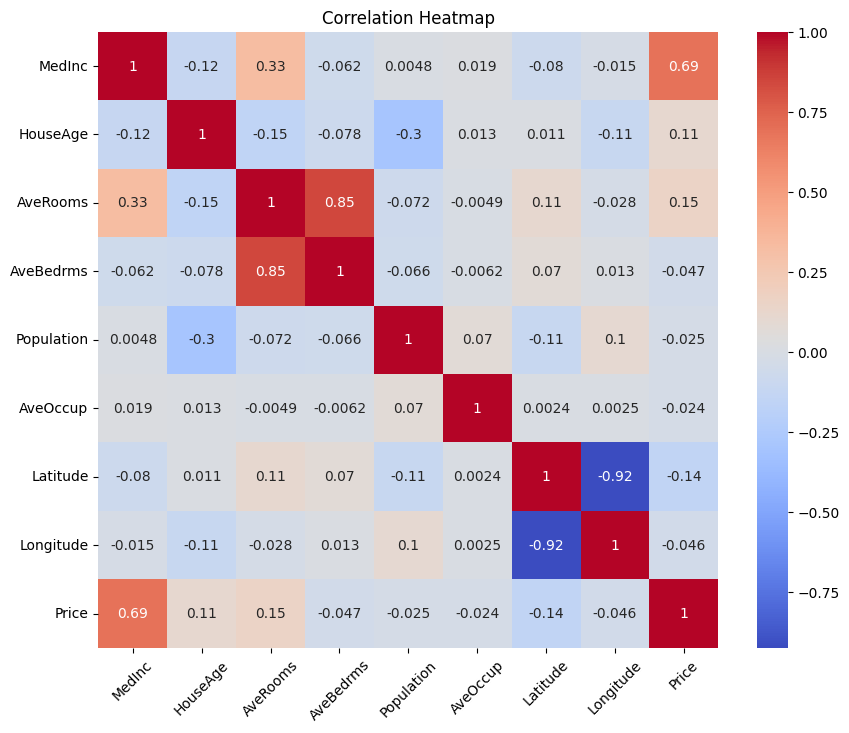

In [17]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")

plt.xticks(rotation=45)

plt.show()

In [26]:
X = df.drop(columns=["Price"])
y = df["Price"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define preprocessing steps
numeric_features = X.columns
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[("num", numeric_transformer, numeric_features)]
)

In [30]:
# List of models to train
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "SVC_Linear": SVR(kernel="linear"),
    "SVC_RBF": SVR(kernel="rbf"),
    "SVC_Poly": SVR(kernel="poly"),
    "XGBRegressor": XGBRegressor(),
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = r2
    print(f"{model_name} R² Score: {r2:.4f}")

LinearRegression R² Score: 0.5758
DecisionTreeRegressor R² Score: 0.6300
RandomForestRegressor R² Score: 0.8065
SVC_Linear R² Score: 0.5579
SVC_RBF R² Score: 0.7276
SVC_Poly R² Score: 0.2345
XGBRegressor R² Score: 0.8301


In [32]:
model = XGBRegressor()
pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model)])
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"XGBRegressor R² Score: {r2:.4f}")

joblib.dump(pipeline, "xgboost_california_housing_model.pkl")

XGBRegressor R² Score: 0.8301


['xgboost_boston_model.pkl']

In [36]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

In [38]:
pipeline.predict(
    pd.DataFrame(
        [[1, 1, 1, 1, 1, 1, 1, 1]],
        columns=[
            "MedInc",
            "HouseAge",
            "AveRooms",
            "AveBedrms",
            "Population",
            "AveOccup",
            "Latitude",
            "Longitude",
        ],
    )
)

array([2.7332237], dtype=float32)